In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv('combined_data_with_extra_data2.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,ERR1075960,Male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR1854747,Male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR688529,Male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR1316059,Male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR5649200,Male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,SRR7690181,male,68.0,USA,28.75,Health,0.000000,0.021739,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,SRR7690182,female,69.0,USA,29.05,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,SRR7690183,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,SRR7690184,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['Run ID', 'Sex', 'Age', 'Country', 'BMI', 'Condition', 'Alistipes',
       'Bacteroides', 'Bifidobacterium', 'Blautia', 'Clostridium', 'Dorea',
       'Eubacterium', 'Faecalibacterium', 'Oscillibacter', 'Parabacteroides',
       'Roseburia', 'Ruminococcus', 'Unknown', 'Coprococcus', 'Lachnospira',
       'Oscillospira', 'Subdoligranulum', 'Sutterella', 'Anaerostipes',
       'Streptococcus', 'Akkermansia', 'Anaerofilum', 'Anaerotruncus',
       'Bacillus', 'Barnesiella', 'Desulfovibrio', 'Dialister',
       'Erysipelatoclostridium', 'Holdemania', 'Intestinibacter',
       'Lachnoclostridium', 'Lactobacillus', 'Odoribacter', 'Prevotella',
       'Pseudomonas', 'Sporobacter', 'Ruminiclostridium', 'Corynebacterium',
       'Eggerthella', 'Acinetobacter', 'Parasutterella', 'Veillonella',
       'Uncultured Organism', 'Ruminococcaceae', 'Phocaeicola',
       'Paraprevotella', 'Tidjanibacter', 'Flavonifractor',
       'Mediterraneibacter', 'Agathobacter', 'Ligilactobacillus',
       '

In [4]:
df['Ruminococcus'] += df[['Ruminococcaceae']].sum(axis=1)

In [5]:
df = df.drop(['Ruminococcaceae', 'Unknown', 'Uncultured Organism', 'Sex', 'Age', 'Country', 'BMI', 
             'Run ID'], axis=1)

In [6]:
numeric_cols = df.select_dtypes(include=['number'])
# df[df.sum(axis=1) == 0]
zero_rows = numeric_cols.sum(axis=1) == 0
#df = df.drop(zero_rows, axis=0)
df = df[~zero_rows]

In [7]:
df[numeric_cols.columns] = numeric_cols.div(numeric_cols.sum(axis=1), axis=0)

In [8]:
df.reset_index(drop=True)

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Health,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,0.209882,0.025343,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Health,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Health,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Health,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Health,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,Health,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df['Condition'].unique()

array(['Health', 'Parkinsons', 'Alzheimers',
       'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy', 'Depression', 'Schizophrenia'],
      dtype=object)

In [10]:
df = df[(df['Condition'] != 'Alzheimers') & 
        (df['Condition'] != 'Parkinsons')]

In [11]:
df['Condition'].unique()

array(['Health', 'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy', 'Depression', 'Schizophrenia'],
      dtype=object)

In [12]:
df.reset_index(drop=True)

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Health,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,0.209882,0.025343,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Health,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Health,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Health,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Health,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,Health,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_label = df['Condition']
df_label_string = df_label

In [14]:
dictionary = {'Health':0,
              'Bipolar Disorder, Depression, Schizophrenia':1,
              'Bipolar Disorder, Depression, Epilepsy, Schizophrenia':2,
              'Bipolar Disorder':3,
              'Epilepsy':4,
              'Depression':5, 
              'Schizophrenia':6
}

In [15]:
y = df_label.map(dictionary)

In [16]:
y.reset_index(drop=True)

0       0
1       0
2       0
3       0
4       0
       ..
1480    3
1481    0
1482    3
1483    3
1484    3
Name: Condition, Length: 1485, dtype: int64

In [17]:
df = df.drop(['Condition'], axis=1)

In [18]:
numeric_cols = df.select_dtypes(include='number').columns 
df[numeric_cols] = df[numeric_cols].apply(lambda col: np.where(col > 0, col.name, 0))
df

,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,0,0,0,0,0,0,Eubacterium,0,Oscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1640,0,Bacteroides,0,0,0,0,0,0,0,0,...,0,Paraprevotella,0,0,0,0,0,0,0,0
1642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1643,0,Bacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.columns = range(1, len(df.columns) + 1)

In [20]:
df.reset_index(drop=True)

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,0,0,0,0,0,Eubacterium,0,Oscillibacter,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,Bacteroides,0,0,0,0,0,0,0,0,...,0,Paraprevotella,0,0,0,0,0,0,0,0
1482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,0,Bacteroides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.loc[1]

1            Alistipes
2          Bacteroides
3      Bifidobacterium
4              Blautia
5          Clostridium
6                Dorea
7          Eubacterium
8     Faecalibacterium
9        Oscillibacter
10     Parabacteroides
11           Roseburia
12        Ruminococcus
13                   0
14                   0
15                   0
16                   0
17                   0
18                   0
19                   0
20                   0
21                   0
22                   0
23                   0
24                   0
25                   0
26                   0
27                   0
28                   0
29                   0
30                   0
31                   0
32                   0
33                   0
34                   0
35                   0
36                   0
37                   0
38                   0
39                   0
40                   0
41                   0
42                   0
43                   0
44         

In [22]:
df.replace("0", pd.NA, inplace=True)
df = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

In [23]:
df = pd.DataFrame(df)
df.fillna('').replace('None', '', inplace=True)

In [24]:
df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,None,None,None,None,None,None,None,None,None,None
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,None,None,None,None,None,None,None,None,None,None
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,None,None,None,None,None,None,None,None,None,None
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,None,None,None,None,None,None,None,None,None,None
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Eubacterium,Oscillibacter,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1481,Bacteroides,Paraprevotella,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1482,Odoribacter,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1483,Bacteroides,Prevotella,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [25]:
df.fillna(0, inplace=True)

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
1,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
2,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
3,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
4,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Eubacterium,Oscillibacter,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1481,Bacteroides,Paraprevotella,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1482,Odoribacter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,Bacteroides,Prevotella,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.loc[1]

0            Alistipes
1          Bacteroides
2      Bifidobacterium
3              Blautia
4          Clostridium
5                Dorea
6          Eubacterium
7     Faecalibacterium
8        Oscillibacter
9      Parabacteroides
10           Roseburia
11        Ruminococcus
12                   0
13                   0
14                   0
15                   0
16                   0
17                   0
18                   0
19                   0
20                   0
21                   0
22                   0
23                   0
24                   0
25                   0
26                   0
27                   0
28                   0
29                   0
30                   0
31                   0
32                   0
Name: 1, dtype: object

In [28]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{0, 'Tidjanibacter', 'Anaerotruncus', 'Sporobacter', 'Roseburia', 'Akkermansia', 'Desulfovibrio', 'Agathobacter', 'Pseudomonas', 'Clostridium', 'Faecalibacterium', 'Parabacteroides', 'Oscillibacter', 'Dorea', 'Anaerobutyricum', 'Mediterraneibacter', 'Acinetobacter', 'Lachnoclostridium', 'Anaerostipes', 'Eubacterium', 'Paraprevotella', 'Erysipelatoclostridium', 'Prevotella', 'Blautia', 'Anaerofilum', 'Flavonifractor', 'Streptococcus', 'Lactobacillus', 'Barnesiella', 'Bifidobacterium', 'Holdemania', 'Parasutterella', 'Veillonella', 'Bacillus', 'Bacteroides', 'Coprococcus', 'Escherichia', 'Eggerthella', 'Alistipes', 'Collinsella', 'Phocaeicola', 'Corynebacterium', 'Ligilactobacillus', 'Dialister', 'Ruminococcus', 'Ruminiclostridium', 'Intestinibacter', 'Odoribacter'}


In [29]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

# ohe -> One-Hot-Encoded
ohe_df = pd.DataFrame(encoded_vals).drop(columns=0)
ohe_df


,Tidjanibacter,Anaerotruncus,Akkermansia,Odoribacter,Desulfovibrio,Agathobacter,Pseudomonas,Mediterraneibacter,Anaerobutyricum,Acinetobacter,...,Parabacteroides,Bacteroides,Blautia,Dorea,Oscillibacter,Bifidobacterium,Alistipes,Eubacterium,Roseburia,Ruminococcus
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1481,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1482,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [30]:
X = ohe_df

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [59]:
model = MultinomialNB()

In [60]:
model.fit(X_train, y_train)

MultinomialNB()

In [61]:
y_pred = model.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy, decimals=4)

0.7407

In [64]:
y_prob = model.predict_proba(X_test)
# rows are samples and the columns are the probabilities of that sample belonging to the corresponding class 
y_prob[1]

array([7.75761569e-18, 6.81615618e-01, 1.70369910e-03, 3.16298273e-01,
       3.82408430e-04, 5.16990816e-10, 9.82718437e-10])

In [65]:
y_test_array = np.array(y_test)
y_test_bin = label_binarize(y_test_array, classes=np.arange(7))  # Shape: (num_samples, 8)
y_test_bin[1]

array([0, 1, 0, 0, 0, 0, 0])

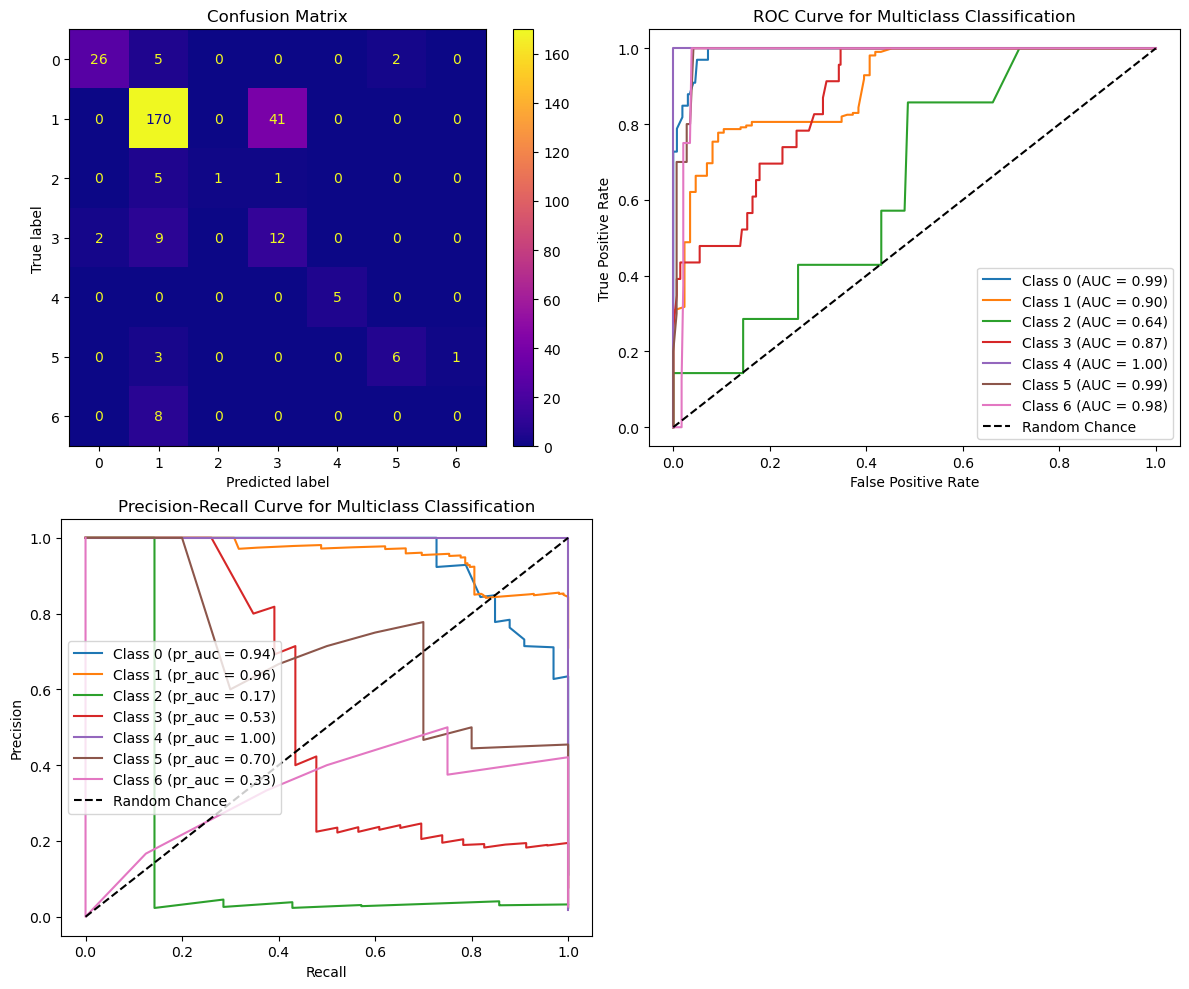

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
for i in range(7): 
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    axs[0, 1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification')
axs[0, 1].legend()

# precision-recall curve
for i in range(7): 
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc = auc(recall, precision)
    axs[1, 0].plot(recall, precision, label=f'Class {i} (pr_auc = {pr_auc:.2f})')

axs[1, 0].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('mn_nb_psych.jpg')
plt.show()
